In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
filename = '/content/drive/Othercomputers/My Laptop/data-science-assignments/03 - Data Visualization/mortgages.csv'

In [7]:
df = pd.read_csv(filename,header=0)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [8]:
df.tail()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
1075,176,15619.91,3163.17,65.08,3098.09,12521.82,15 Year,0.05
1076,177,12521.82,3163.17,52.17,3111.00,9410.82,15 Year,0.05
1077,178,9410.82,3163.17,39.21,3123.96,6286.86,15 Year,0.05
1078,179,6286.86,3163.17,26.19,3136.98,3149.88,15 Year,0.05
1079,180,3149.88,3163.17,13.12,3150.05,-0.17,15 Year,0.05


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [10]:
df['Mortgage Name'].value_counts()

30 Year    720
15 Year    360
Name: Mortgage Name, dtype: int64

In [11]:
Mortgage_30_Year_filter = df['Mortgage Name'] == '30 Year'

In [12]:
Interest_Rate_3_filter = df['Interest Rate'] == 0.03

In [13]:
Interest_Rate_5_filter = df['Interest Rate'] == 0.05

In [14]:
df.loc[df['Interest Rate'] > 0.00,['Mortgage Name','Interest Rate']].value_counts()

Mortgage Name  Interest Rate
30 Year        0.05             360
               0.03             360
15 Year        0.05             180
               0.03             180
dtype: int64

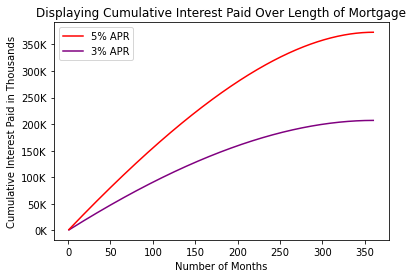

In [15]:
df.loc[Mortgage_30_Year_filter & Interest_Rate_5_filter,'Month']
line1, = plt.plot(df.loc[Mortgage_30_Year_filter & Interest_Rate_3_filter,'Month'],df.loc[Mortgage_30_Year_filter & Interest_Rate_3_filter,'Interest Paid'].cumsum()/1000, label="3% APR",color='purple');
line2, = plt.plot(df.loc[Mortgage_30_Year_filter & Interest_Rate_5_filter,'Month'],df.loc[Mortgage_30_Year_filter & Interest_Rate_5_filter,'Interest Paid'].cumsum()/1000, label="5% APR", color='red');
plt.xlabel('Number of Months')
plt.ylabel('Cumulative Interest Paid in Thousands')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}K'))
plt.title('Displaying Cumulative Interest Paid Over Length of Mortgage')
plt.legend(handles = [line2,line1]);